In [1]:
import pandas as pd 

from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\Users\bagat\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
df = pd.read_csv("D:\MachineLearningCourse\Datasets\house_data.csv")

In [3]:
X = df.drop(["id","date","price"],axis=1)
y = df["price"]

In [4]:
X = np.array(X)
y = np.array(y)

In [5]:
x_train,x_test,y_train,y_test = train_test_split(X,y)

In [6]:
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [7]:
clf = LinearRegression()
clf.fit(x_train,y_train)
print("Train acc: ",clf.score(x_train,y_train))
print("Test acc: ",clf.score(x_test,y_test))
print("R Square: ",r2_score(y_test,clf.predict(x_test)))

Train acc:  0.6992071058671865
Test acc:  0.6989150083165899
R Square:  0.6989150083165899


In [11]:
y_train.shape

(16209,)

In [17]:
clf = Ridge(alpha=10)
clf.fit(x_train,y_train)

print("Train acc: ",clf.score(x_train,y_train))
print("Test acc: ",clf.score(x_test,y_test))
print("R Square: ",r2_score(y_test,clf.predict(x_test)))

Train acc:  0.6963048477562793
Test acc:  0.692068732450724
R Square:  0.692068732450724


In [18]:
clf = Lasso(alpha=100)
clf.fit(x_train,y_train)

print("Train acc: ",clf.score(x_train,y_train))
print("Test acc: ",clf.score(x_test,y_test))
print("R Square: ",r2_score(y_test,clf.predict(x_test)))

Train acc:  0.698763560543447
Test acc:  0.6968066874833978
R Square:  0.6968066874833978


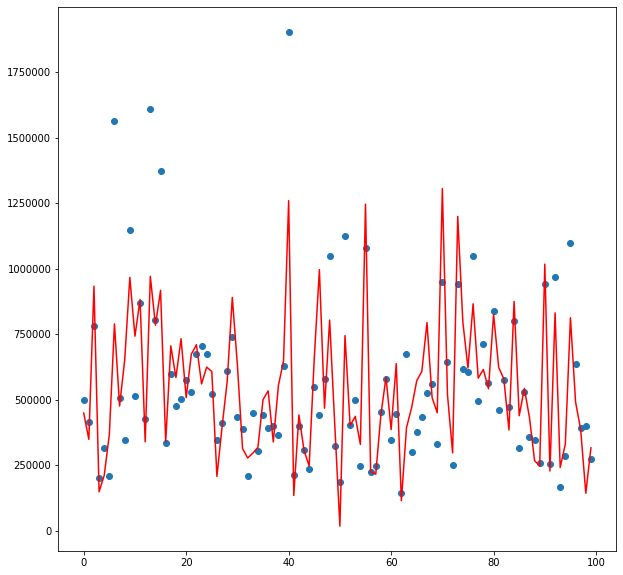

In [19]:
plt.figure(figsize=(10,10))

plt.scatter(np.arange(100),y_test[:100])
plt.plot(np.arange(100),clf.predict(x_test[:100]),color="r")

plt.show()

# Polynomial Features



In [21]:
np.random.seed(0)
x = 2 - 3*np.random.normal(0,1,20)
y = x-2*(x**2)+0.5*(x**3)+np.random.normal(-3, 3, 20)

In [22]:
x = x.reshape(-1,1)
print(x.shape)

(20, 1)


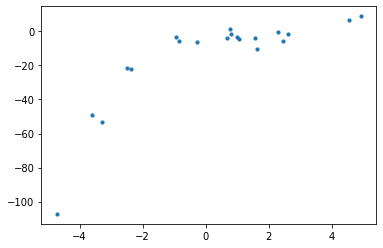

In [23]:
plt.scatter(x,y,s=10)
plt.show()

In [24]:
clf = LinearRegression()
clf.fit(x,y)
y_pred = clf.predict(x)

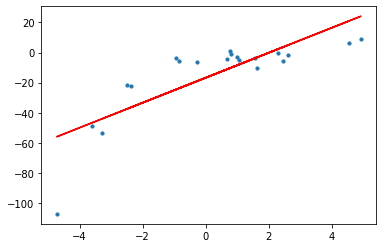

In [25]:
plt.scatter(x,y,s=10)
plt.plot(x,y_pred,color="r")
plt.show()

In [26]:
from sklearn.preprocessing import PolynomialFeatures

In [27]:
poly = PolynomialFeatures(degree=2)
x_poly = poly.fit_transform(x)

In [58]:
x_poly.shape

(20, 3)

In [30]:
clf = LinearRegression()
clf.fit(x_poly,y)
y_poly_pred = clf.predict(x_poly)

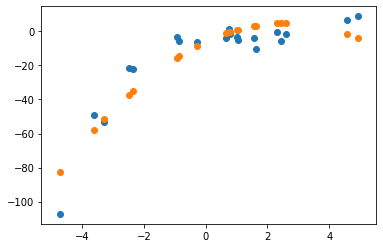

In [33]:
plt.scatter(x,y)

plt.scatter(x,y_poly_pred)

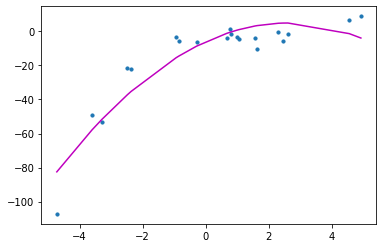

In [34]:
import operator

plt.scatter(x, y, s=10)
# sort the values of x before line plot

sorted_zip = sorted(zip(x,y_poly_pred))
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()
